## XGBoost

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

%matplotlib inline

warnings.filterwarnings('ignore')

In [108]:
# Load dataset
train = pd.read_csv('/kaggle/input/forest-type-classification-spai/train.csv')
train

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF


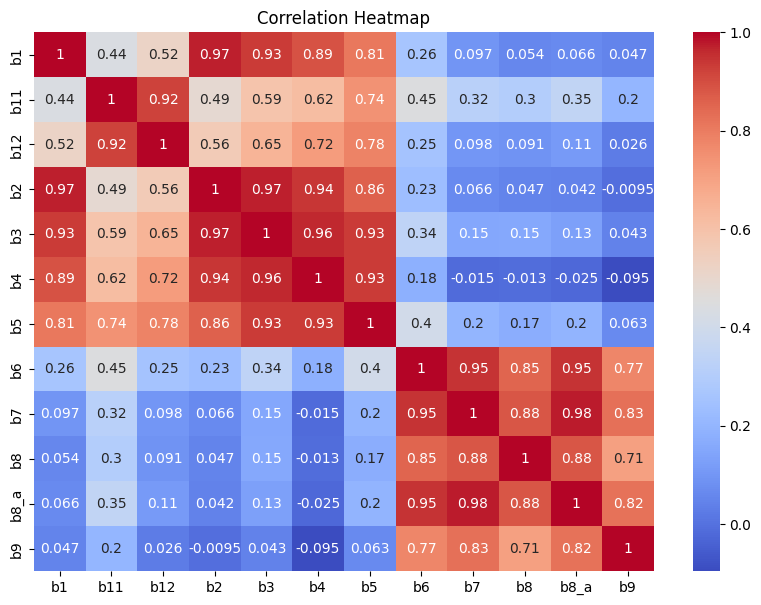

In [109]:
plt.figure(figsize=(10, 7))
correlation_matrix = train.drop(columns=['id', 'nforest_type']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

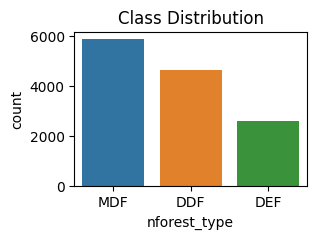

MDF: 5865, DDF: 4603, DEF: 2585


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3, 2))
ax = sns.countplot(data=train, x='nforest_type')
plt.title('Class Distribution')
plt.show()

count_MDF = len(train[train['nforest_type'] == 'MDF'])
count_DDF = len(train[train['nforest_type'] == 'DDF'])
count_DEF = len(train[train['nforest_type'] == 'DEF'])

print(f'MDF: {count_MDF}, DDF: {count_DDF}, DEF: {count_DEF}')

In [111]:
# Update parameters for multi-class classification
params = {
    'objective': 'multi:softmax',
    'num_class': 3,  # Number of classes
    'max_depth': 5,
    'alpha': 10,
    'learning_rate': 0.4,
    'n_estimators': 250
}

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13053 entries, 0 to 13052
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            13053 non-null  int64 
 1   b1            13053 non-null  int64 
 2   b11           13053 non-null  int64 
 3   b12           13053 non-null  int64 
 4   b2            13053 non-null  int64 
 5   b3            13053 non-null  int64 
 6   b4            13053 non-null  int64 
 7   b5            13053 non-null  int64 
 8   b6            13053 non-null  int64 
 9   b7            13053 non-null  int64 
 10  b8            13053 non-null  int64 
 11  b8_a          13053 non-null  int64 
 12  b9            13053 non-null  int64 
 13  nforest_type  13053 non-null  object
dtypes: int64(13), object(1)
memory usage: 1.4+ MB


In [115]:
X = train.drop('nforest_type', axis=1)
y = train['nforest_type']

In [ ]:
y_encoded = LabelEncoder(y)

In [117]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=40)

# Update parameters for multi-class classification
params = {
    'objective': 'multi:softmax',
    'num_class': 3,  # Number of classes
    'max_depth': 5, ###
    'alpha': 10,
    'learning_rate': 0.4,
    'n_estimators': 250
}

In [119]:
# Instantiate the classifier
xgb_clf = XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [120]:
# Load test dataset
test = pd.read_csv('/kaggle/input/forest-type-classification-spai/test.csv')

In [121]:
test

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9
0,13467,69,1425,693,312,524,376,847,1821,2356,2378,2611,2595
1,12719,242,1514,691,343,522,324,718,1730,2178,2472,2359,2582
2,1054,218,2354,1118,292,596,410,965,2586,3226,3371,3645,3149
3,13747,350,2013,1134,306,572,475,982,1754,1935,2275,2290,2345
4,9453,185,1450,712,293,440,384,673,1487,1965,2213,2200,2193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,115,447,1686,811,425,661,441,958,2432,2891,2966,3126,3312
3996,10654,252,2694,1503,470,778,753,1294,2334,2656,2679,3212,2856
3997,5718,233,1486,618,249,409,260,699,2188,2831,3030,3086,3087
3998,13054,221,1840,774,245,441,231,703,2491,3453,3284,3762,3161


In [122]:
# Instantiate the classifier
xgb_clf = XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None, num_class=3, ...)

In [123]:
# Load test dataset
# test = pd.read_csv('/kaggle/input/forest-type-classification-spai/test.csv')

# Make predictions on the test set
test_predictions = xgb_clf.predict(test)

# Convert numeric predictions back to original string labels
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Create a DataFrame for the predictions
output = pd.DataFrame({'Id': test.index, 'Predicted': test_predictions_labels})
output

# # Save the predictions to a CSV file
# output.to_csv('test_predictions.csv', index=False)
# print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


In [128]:
# Load sample submission file
sample_submission = pd.read_csv('/kaggle/input/forest-type-classification-spai/sample_submission.csv')

# Create submission DataFrame
submission = pd.DataFrame({'id': sample_submission['id'], 'nforest_type': test_predictions_labels})
submission

# # Save the submission DataFrame to a CSV file
submission.to_csv('submission_.csv', index=False)
submission

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DEF
...,...,...
3995,115,MDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [126]:
submission = pd.read_csv('/kaggle/working/submission_.csv')
submission

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DEF
...,...,...
3995,115,MDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF
